# Import Data


In [695]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install xlrd
%pip install scikit-learn
%pip install seaborn
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
import seaborn as sns  # สร้างกราฟ Boxplot
from scipy.stats import zscore
from sklearn.metrics import mean_absolute_error
from pandas import DataFrame
import re
import os
import seaborn as sns

%matplotlib inline


In [4]:
# Define the directory to search for CSV and XLS files
directory = Path(r'./dataset2/')
# Find all CSV and XLS files in the directory and its subdirectories
xlsx = list(directory.rglob('*.xlsx'))

In [5]:
sim_base = {}
df_concat = pd.DataFrame()


for xls in xlsx:
    for sheet in list(pd.ExcelFile(xls).sheet_names):
        df_concat = pd.concat(
            [df_concat, pd.read_excel(xls, sheet_name=sheet)], axis=0)
        # match = re.search(r'\((\D+\.\D+\.)\d+\)', xls.name)

        # if match:
        #     month_abbreviation = match.group(1)
        #     if month_abbreviation not in sim_base:
        #         sim_base[month_abbreviation] = {min: 0, max: 0}
        #     if sim_base[month_abbreviation][min] > df_concat.:
        #         sim_base[month_abbreviation][min] = df_concat.min(skipna=True)
        #     if sim_base[month_abbreviation][max] < df_concat.max(skipna=True):
        #         sim_base[month_abbreviation][max] = df_concat.max(skipna=True)
df_concat.columns.values[0] = 'date'
df_concat.columns = df_concat.iloc[0]
df_concat.columns = df_concat.columns.str.replace('\n', '')
df_concat = df_concat.drop(0)
df_concat = df_concat.drop(columns=df_concat.columns[-2:])

In [6]:
df_concat


,ลำดับที่,จุดตรวจ,ค่าพิกัดUTM-X,ค่าพิกัดUTM-Y,วัน/เดือน/ปี,เวลา,Temp ไม่เกิน 40 ๐c,pH,EC,Sal,DO,TDS
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(ระหว่าง,"(ไม่เกิน 2,000",( ไม่เกิน,( ไม่น้อยกว่า,"( ไม่เกิน 1,300"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5 - 8.5),mmhos/cm.),1.0 g/l ),2.0 mg/l ),mg/l )
3,โซนน้ำจืด (น้ำที่ใช้เพื่อการเกษตร),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,เหนือน้ำ ปตร.อุทกวิภาชประสิทธิ,632928,919603,1965-11-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,โรงสูบน้ำประปาปากพนัง,631753,918266,1965-11-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
25,21,ท้าย ปตร.เสือหึง,637859,906329,1965-07-20 00:00:00,NaN,26.9,7.33,43976,27.2,1.7,27559
26,22,ท้าย ปตร.ท่าพญา,637950,914923,1965-07-20 00:00:00,NaN,27.5,7.37,2482,1.21,3.5,1539
27,23,ท้าย ปตร.ฉุกเฉิน,634278,919648,1965-07-20 00:00:00,NaN,27.2,7.49,45527,28.18,4.1,28440
28,24,ท้าย ปตร.คลองลัด,634259,919880,1965-07-20 00:00:00,NaN,27.1,7.7,46090,28.56,3.8,28798


# Preprocessing - Data Cleaning


In [7]:
df_concat.shape

(1199, 12)

In [8]:
df = df_concat.copy()
df.rename(columns=lambda x: x.strip(), inplace=True)


In [9]:
df.columns

Index(['ลำดับที่', 'จุดตรวจ', 'ค่าพิกัดUTM-X', 'ค่าพิกัดUTM-Y', 'วัน/เดือน/ปี',
       'เวลา', 'Temp ไม่เกิน 40 ๐c', 'pH', 'EC', 'Sal', 'DO', 'TDS'],
      dtype='object', name=0)

In [10]:

# เลือกเฉพาะ columns
df = df[["วัน/เดือน/ปี", "Temp ไม่เกิน 40 ๐c", "pH", "EC", "Sal",	"DO",	"TDS"]]

In [11]:
df.columns.values[0] = "Date"
df.columns.values[1] = "Temp"


## missing value


In [12]:
# ตรวจสอบ missing value
df.isnull().sum()

0
Date    196
Temp    280
pH      227
EC      221
Sal     232
DO      236
TDS     236
dtype: int64

In [13]:
# แปลงตัวเลขที่เป็น string ให้เป็นตัวเลข และ เปลี่ยนตัวอักษรที่ไม่ถูกต้องให้เป็น NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
# df = df.fillna(df.mean())

In [15]:
# ลบข้อมูลที่มี missing value ออกไป
df.dropna(subset=df.columns.to_list()[1:], inplace=True)

In [19]:
df.isnull().sum()

0
Date    870
Temp      0
pH        0
EC        0
Sal       0
DO        0
TDS       0
dtype: int64

In [20]:
# reset index
df = df.reindex()

## Outlier data


In [21]:
# แสดงค่าสถิติพื้นฐาน
df.describe()

,Date,Temp,pH,EC,Sal,DO,TDS
count,0.0,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,NaN,27.081793,7.056851,8439.196552,5.316368,4.581264,4230.288506
std,NaN,1.744064,0.553029,14658.985206,10.791402,2.944436,8281.609516
min,NaN,2.800000,0.970000,97.000000,0.040000,0.100000,3.000000
25%,NaN,26.280000,6.700000,255.000000,0.120000,2.670000,161.250000
50%,NaN,27.000000,7.000000,755.000000,0.350000,3.905000,495.000000
75%,NaN,27.700000,7.350000,5847.000000,3.142500,5.600000,1986.500000
max,NaN,34.000000,8.730000,50237.000000,129.000000,16.790000,33366.000000


array([[<Axes: title={'center': 'Temp'}>, <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'EC'}>, <Axes: title={'center': 'Sal'}>],
       [<Axes: title={'center': 'DO'}>, <Axes: title={'center': 'TDS'}>]],
      dtype=object)

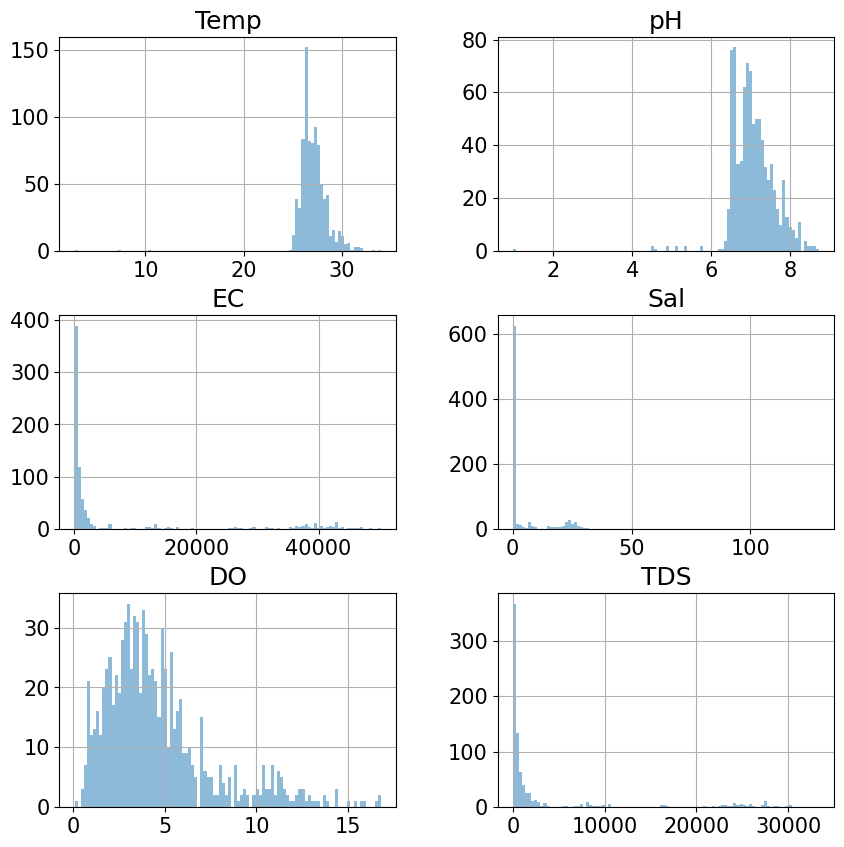

In [50]:
df.loc[:, df.columns != 'Date'].hist(
    figsize=(10, 10), bins=100, alpha=0.5,)

<Axes: >

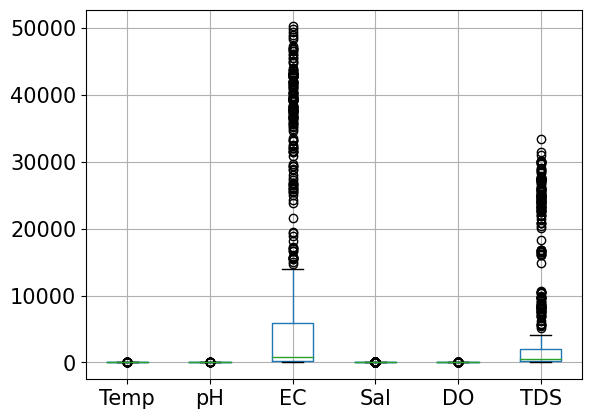

In [54]:
df.loc[:, df.columns != 'Date'].boxplot()

จัดการ outlier data


In [24]:
def remove_outliers_iqr(dataframe, columns):
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        threshold = 1.5
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        print(column+">"+"lower_bound:"+str(lower_bound) +
              " upper_bound:"+str(upper_bound))
        dataframe = dataframe[(dataframe[column] >= lower_bound) & (
            dataframe[column] <= upper_bound)]
    return dataframe


In [25]:
df_out = df.copy()

df_out = remove_outliers_iqr(
    df_out, ["Temp", "pH", "EC", "Sal",	"DO",	"TDS"])

Temp>lower_bound:24.150000000000006 upper_bound:29.83
pH>lower_bound:5.715000000000002 upper_bound:8.315
EC>lower_bound:-14955.625 upper_bound:25603.375
Sal>lower_bound:-0.66125 upper_bound:1.36875
DO>lower_bound:-2.6687499999999997 upper_bound:10.56125
TDS>lower_bound:-483.0 upper_bound:1157.0


<Axes: >

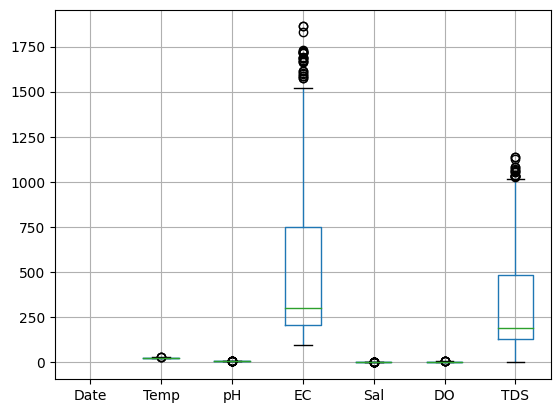

In [26]:
df_out.boxplot()

array([[<Axes: title={'center': 'Temp'}>, <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'EC'}>, <Axes: title={'center': 'Sal'}>],
       [<Axes: title={'center': 'DO'}>, <Axes: title={'center': 'TDS'}>]],
      dtype=object)

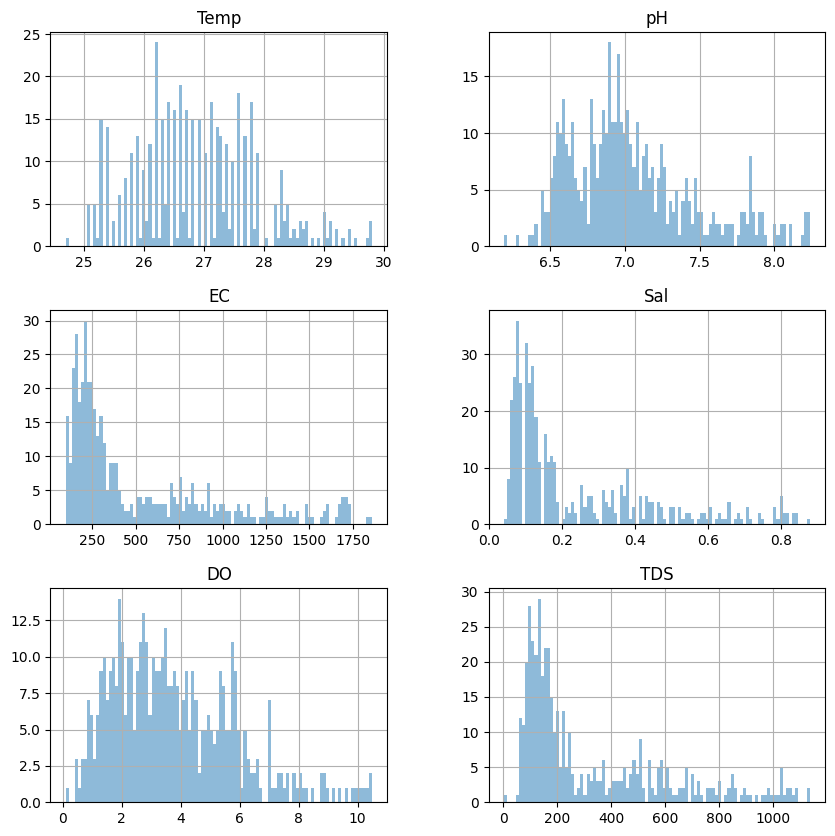

In [44]:
df_out.loc[:, df_out.columns != 'Date'].hist(
    figsize=(10, 10), bins=100, alpha=0.5,)

## Duplicate data


In [28]:
print('จำนวน Duplicate Data df:', df_out.duplicated().sum())


จำนวน Duplicate Data df: 46


In [29]:
# ลบ Duplicate Data
df_out = df_out.drop_duplicates()


In [30]:
df_split_copy = df_out.copy()


## แบ่งชุดข้อมูล


In [31]:
seed = 7777

df_train, df_test = train_test_split(
    df_split_copy, test_size=0.1, random_state=seed)


In [32]:
# df_test = df_test.sort_values(by=['Sal'])

In [33]:
# จำนวนชุดข้อมูล
print('จำนวนชุดข้อมูลทั้งหมด :', len(df_out))
print('จำนวนชุดข้อมูล training :', len(df_train))
print('จำนวนชุดข้อมูล test :', len(df_test))

จำนวนชุดข้อมูลทั้งหมด : 458
จำนวนชุดข้อมูล training : 412
จำนวนชุดข้อมูล test : 46


In [34]:
X_columns = ["Temp", "pH", "EC", 	"DO",	"TDS"]

In [35]:
df_train


,Date,Temp,pH,EC,Sal,DO,TDS
16,NaN,26.30,7.12,670.0,0.32,2.67,415.0
14,NaN,28.37,6.45,228.0,0.10,8.12,139.0
15,NaN,27.22,6.58,295.0,0.13,9.59,184.0
6,NaN,26.20,6.99,1032.0,0.50,5.80,656.0
15,NaN,26.90,6.97,165.0,0.08,2.15,103.0
...,...,...,...,...,...,...,...
4,NaN,26.70,8.07,1601.0,0.78,5.20,1001.0
22,NaN,25.40,6.89,344.0,0.17,1.42,222.0
7,NaN,26.00,6.29,242.0,0.12,2.18,154.0
11,NaN,25.80,6.93,316.0,0.15,1.96,202.0


In [36]:
X_train = df_train.loc[:, X_columns].values
Y_train = df_train.loc[:, ['Sal']].values

X_test = df_test.loc[:, X_columns].values
Y_test = df_test.loc[:, ['Sal']].values


# KNN


In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [38]:
k = 5
# สร้างโมเดล KNN Regressor
model = KNeighborsRegressor(n_neighbors=k)

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train,  Y_train)

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด test

Y_pred = model.predict(X_test)


In [39]:

# คำนวณค่าความแม่นยำของโมเดล
mae = mean_absolute_error(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
print("mean_absolute_error: ", mae)
print("mean_absolute_percentage_error: ", mape)
print("mean_squared_error: ", mse)

mean_absolute_error:  0.012478260869565211
mean_absolute_percentage_error:  0.04020623729155617
mean_squared_error:  0.001858695652173912


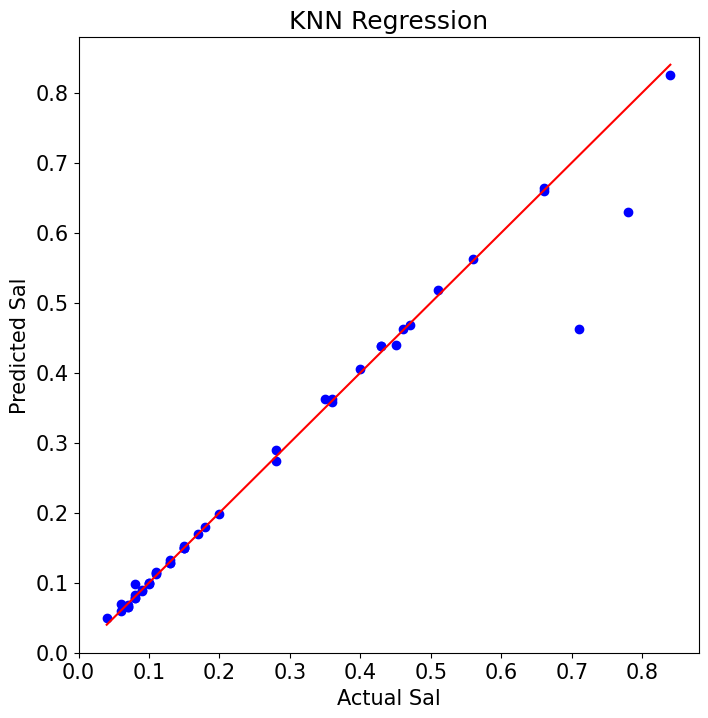

In [48]:
plt.figure(figsize=(8, 8))
# font size
plt.rcParams['font.size'] = 15
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')
plt.xlabel('Actual Sal')
plt.ylabel('Predicted Sal')
plt.title('KNN Regression')
plt.show()